### Linear Regression and Train/Test Split challenges


Ideally, try these with your own data! (Alternatively, there is the
`2013_movies.csv` data set.)

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
## Import data
df = pd.read_csv('../../../../challenges/challenges_data/2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

The results give the mean of all data points for domestic total gross. The residuals are skewed right.

In [6]:
import statsmodels.api as sm
import patsy
df['ones'] = np.ones_like(df['DomesticTotalGross'])
y, X = patsy.dmatrices('DomesticTotalGross ~ ones', data=df, return_type='dataframe')
model = sm.OLS(y, X)
res = model.fit()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
res.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 28 Jan 2018   Prob (F-statistic):                nan
Time:                        21:30:22   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
ones         5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     3.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
y_pred = res.predict(X)

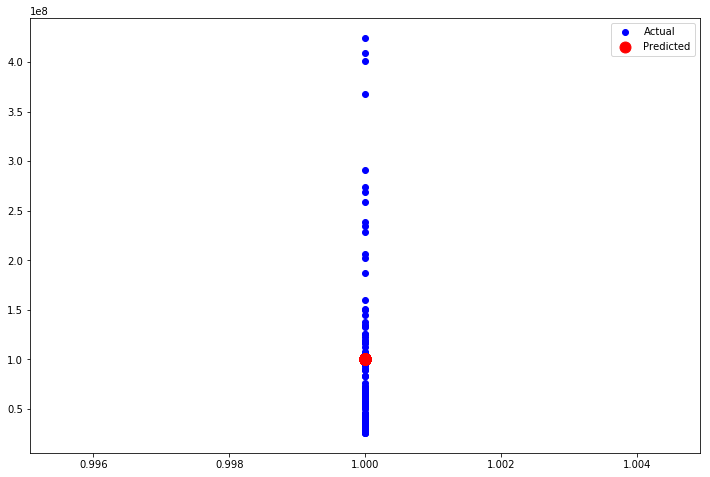

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X['ones'], y, label='Actual', c='b')
plt.scatter(X['ones'], y_pred, label='Predicted', c='r', s=120)
plt.legend();

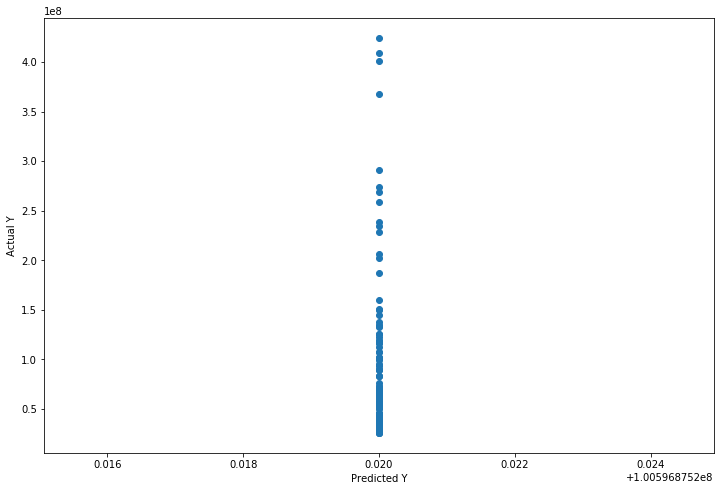

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y)
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

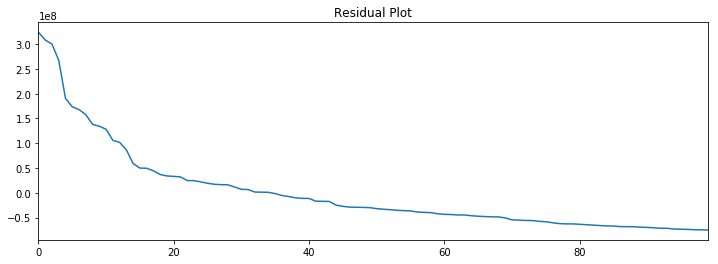

In [11]:
plt.figure(figsize=(12,4));
res.resid.plot();
plt.title('Residual Plot')

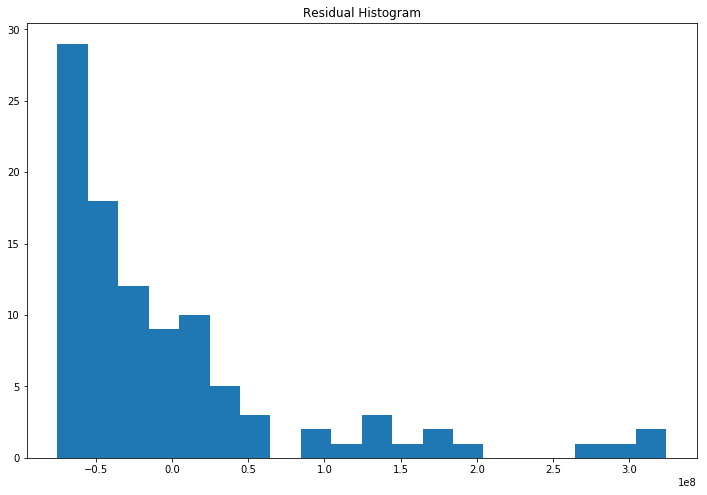

In [12]:
plt.figure(figsize=(12,8))
plt.hist(res.resid, bins=20);
plt.title('Residual Histogram')

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [13]:
# Include ones and budget
y, X = patsy.dmatrices('DomesticTotalGross ~ ones + Budget', data=df, return_type='dataframe')
model = sm.OLS(y, X)
res = model.fit()

In [14]:
y_pred = res.predict(X)

In [15]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           6.80e-08
Time:                        21:30:24   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
ones         2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     7.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

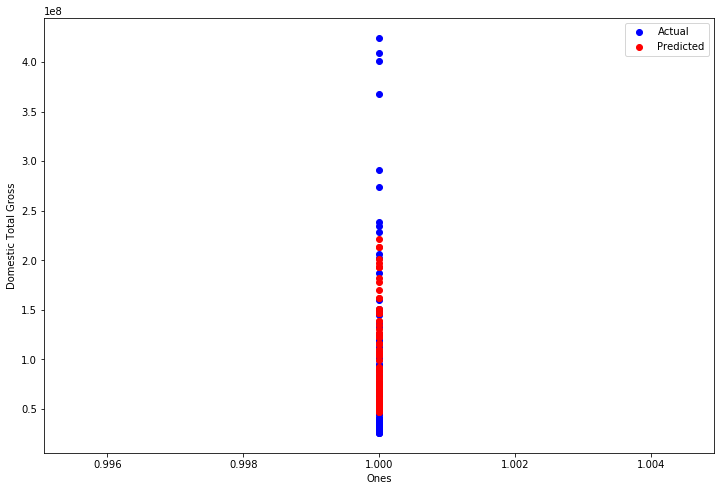

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(X['ones'], y, label='Actual', c='b')
plt.scatter(X['ones'], y_pred, label='Predicted', c='r')
plt.legend();
plt.xlabel('Ones')
plt.ylabel('Domestic Total Gross')

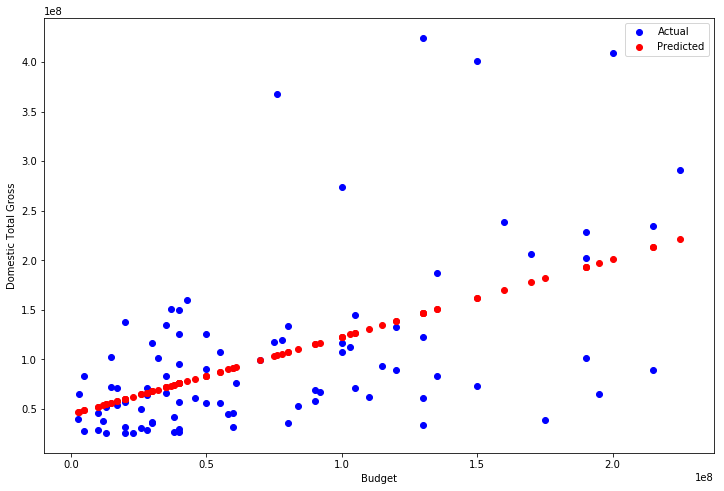

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(X['Budget'], y, label='Actual', c='b')
plt.scatter(X['Budget'], y_pred, label='Predicted', c='r')
plt.legend();
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [18]:
df_with_dummies = df.join(pd.get_dummies(df['Rating'], prefix='Rated', drop_first=True))
df_with_dummies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones,Rated_PG,Rated_PG-13,Rated_R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,1,0


In [19]:
# Include ones and budget
y, X = patsy.dmatrices('DomesticTotalGross ~ ones + Budget + Rated_PG + Q("Rated_PG-13") + Rated_R', data=df_with_dummies, return_type='dataframe')
model = sm.OLS(y, X)
res = model.fit()

In [20]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.61
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.87e-06
Time:                        21:30:25   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3483.
Df Residuals:                      85   BIC:                             3493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.029e+07   6.21e+06      3.270      0.002    7.95e+06    3.26e+07
ones              2.029e+07   6.21e+06      3.270      0.002    7.95e+06    3.26e+07
Budget               0.7816      0.152      5.157      0.000       0.480       1.083
Rated_PG          1.714e+07   1.53e+07      1.122      0.265   -1.32e+07    4.75e+07
Q("Rated_PG-13") -1.257e+05   1.17e+07     -0.011      0.991   -2.33e+07     2.3e+07
Rated_R           3.275e+06    1.2e+07      0.273      0.786   -2.06e+07    2.71e+07
==============================================================================
Omnibus:                       37.951   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.664
Skew:                           1.546   Prob(JB):                     5.58e-20
Kurtosis:                       6.788   Cond. No.                     1.26e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.11e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
y_pred = res.predict(X)

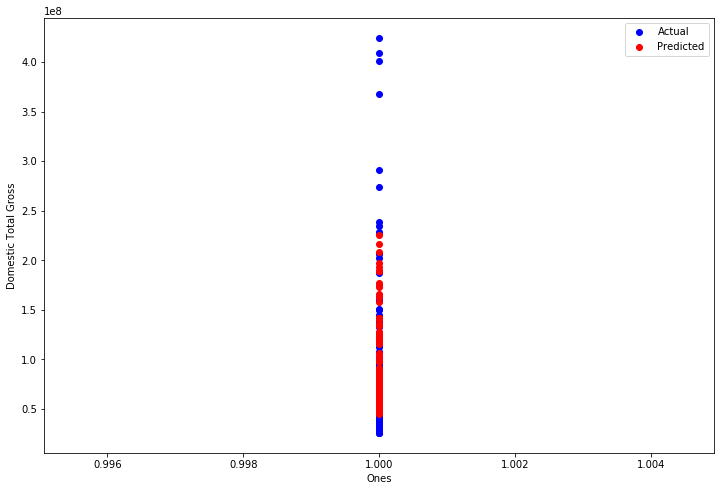

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(X['ones'], y, label='Actual', c='b')
plt.scatter(X['ones'], y_pred, label='Predicted', c='r')
plt.legend();
plt.xlabel('Ones')
plt.ylabel('Domestic Total Gross')

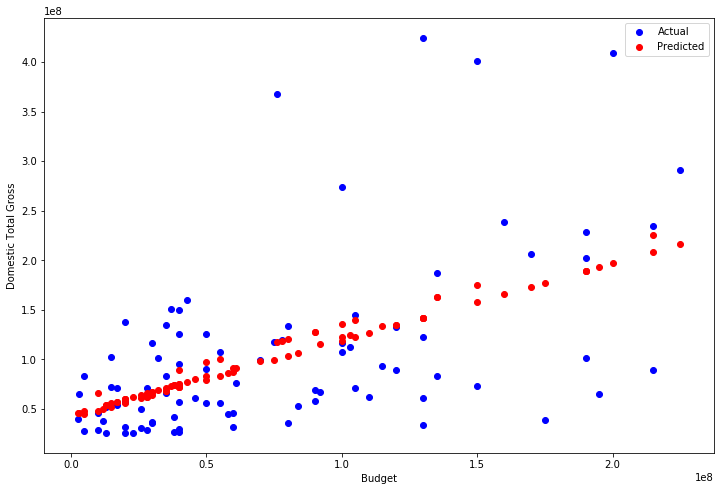

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(X['Budget'], y, label='Actual', c='b')
plt.scatter(X['Budget'], y_pred, label='Predicted', c='r')
plt.legend();
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [24]:
# log_transform 'Budget' and 'DomesticTotalGross', and add 'runtime'
df_with_dummies['log_Budget'] = df_with_dummies['Budget'].apply(np.log)
df_with_dummies['log_DomesticTotalGross'] = df_with_dummies['DomesticTotalGross'].apply(np.log)

In [25]:
# Include ones and budget
y, X = patsy.dmatrices('log_DomesticTotalGross ~ ones + log_Budget + Rated_PG + Q("Rated_PG-13") + Rated_R + Runtime', 
                       data=df_with_dummies, 
                       return_type='dataframe')
model = sm.OLS(y, X)
res = model.fit()

In [26]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.249
Method:                     Least Squares   F-statistic:                     8.300
Date:                    Sun, 28 Jan 2018   Prob (F-statistic):           1.08e-05
Time:                            21:30:26   Log-Likelihood:                -80.654
No. Observations:                      89   AIC:                             171.3
Df Residuals:                          84   BIC:                             183.8
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.1454      0.566      9.098      0.000       4.021       6.270
ones                 5.1454      0.566      9.098      0.000       4.021       6.270
log_Budget           0.3111      0.082      3.811      0.000       0.149       0.473
Rated_PG             1.8297      0.259      7.065      0.000       1.315       2.345
Q("Rated_PG-13")     1.6695      0.223      7.474      0.000       1.225       2.114
Rated_R              1.6461      0.169      9.745      0.000       1.310       1.982
Runtime              0.0061      0.004      1.395      0.167      -0.003       0.015
==============================================================================
Omnibus:                        3.888   Durbin-Watson:                   0.726
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.316
Skew:                           0.162   Prob(JB):                        0.314
Kurtosis:                       2.279   Cond. No.                     1.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.09e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
y_pred = res.predict(X)

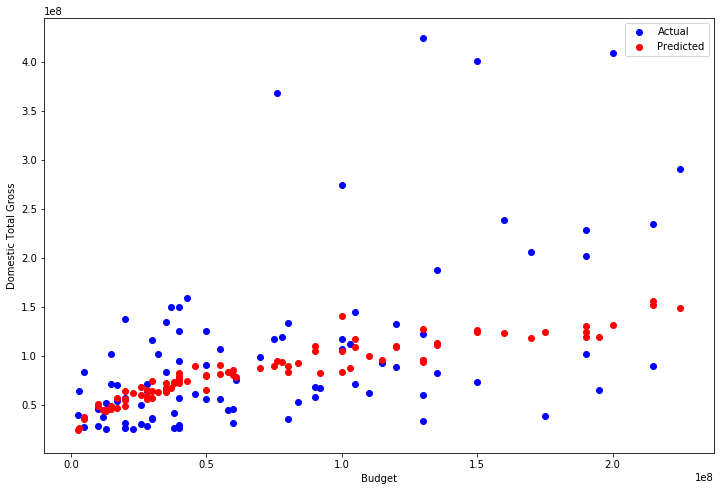

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(X['log_Budget'].apply(np.exp), y.apply(np.exp), label='Actual', c='b')
plt.scatter(X['log_Budget'].apply(np.exp), y_pred.apply(np.exp), label='Predicted', c='r')
plt.legend();
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [29]:
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
# Include ones and budget
y, X = patsy.dmatrices('log_DomesticTotalGross ~ ones + log_Budget + Rated_PG + Q("Rated_PG-13") + Rated_R + Runtime', 
                       data=df_with_dummies, 
                       return_type='dataframe')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
model = sm.OLS(y_train, X_train)
res = model.fit()

In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.275
Model:                                OLS   Adj. R-squared:                  0.227
Method:                     Least Squares   F-statistic:                     5.784
Date:                    Sun, 28 Jan 2018   Prob (F-statistic):           0.000516
Time:                            21:30:27   Log-Likelihood:                -60.558
No. Observations:                      66   AIC:                             131.1
Df Residuals:                          61   BIC:                             142.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.2412      0.766      6.845      0.000       3.710       6.772
ones                 5.2412      0.766      6.845      0.000       3.710       6.772
log_Budget           0.3038      0.111      2.726      0.008       0.081       0.527
Rated_PG             1.9270      0.351      5.486      0.000       1.225       2.629
Q("Rated_PG-13")     1.6687      0.302      5.523      0.000       1.065       2.273
Rated_R              1.6455      0.202      8.130      0.000       1.241       2.050
Runtime              0.0049      0.005      0.917      0.363      -0.006       0.016
==============================================================================
Omnibus:                        4.172   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.757
Skew:                           0.320   Prob(JB):                        0.252
Kurtosis:                       2.231   Cond. No.                     1.46e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.2e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
y_pred = res.predict(X_test)

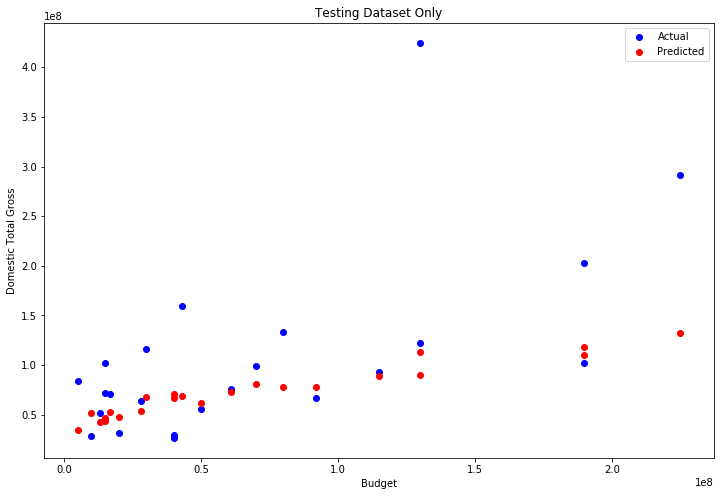

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(X_test['log_Budget'].apply(np.exp), y_test.apply(np.exp), label='Actual', c='b')
plt.scatter(X_test['log_Budget'].apply(np.exp), y_pred.apply(np.exp), label='Predicted', c='r')
plt.legend();
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')
plt.title('Testing Dataset Only')